## Simple Linear Regression

Simple linear regression is a supervised learning algorithm used in machine learning to model the relationship between two variables: one independent variable (input) and one dependent variable (output). It assumes a linear relationship between them, represented by the equation:

[
y = mx + c
]

where:
- \( y \) is the predicted output,
- \( x \) is the independent variable (input),
- \( m \) is the slope of the line (how much \( y \) changes with \( x \)),
- \( c \) is the intercept (the value of \( y \) when \( x = 0 \)).

The goal of simple linear regression is to find the best-fitting line that minimizes the difference between the predicted and actual values of \( y \).

In [1]:
# Simple Linear Regression 
# about dataset:
# It contains 2 simple hight & weight columns 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("height-weight.csv")

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


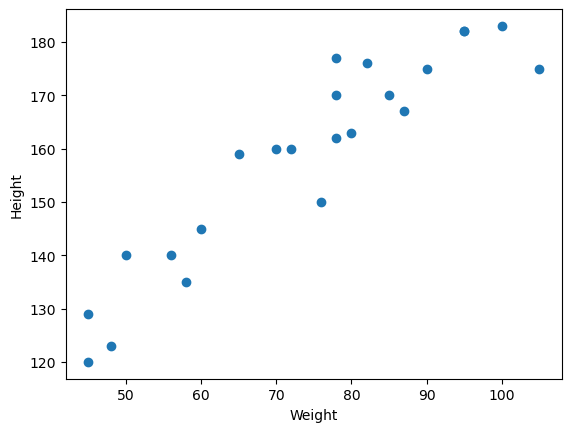

In [5]:
# Observing relation between both variables by scatter plot
plt.scatter(x=df['Weight'], y=df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [6]:
# # Steps to be followed to perform Simple Linear Regression on the given dataset
# 1. Load dataset
# 2. Divide the dataset into dependent and independent features
# 3. Train Test Split of dataset
# 4. Considering 'Weight' as independent feature and 'Height' as dependent or output feature
# 5. Standardize the data
# 6. Perform Linear Regression

In [7]:
# dividing dataset into indep and depen features
X = df[['Weight']] # making it 2 dim to apply standard scalar
y = df['Height']

In [8]:
# train test split
from sklearn.model_selection import train_test_split

In [9]:
# dividing data
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [10]:
# observe the division for input/ independent feature
X.shape,X_train.shape,X_test.shape

((23, 1), (18, 1), (5, 1))

In [11]:
# observe the division for output feature
y.shape,y_train.shape,y_test.shape

((23,), (18,), (5,))

In [12]:
# # standardizing the data
# as data contains large numneric values so, will take longer time
# so we are scaling it domm for faster processing
# so we will apply z-score to apply every datapoint to scale them down 
# Another reason is to make them standard and spread them evenly over in finite area or range
# observe X_train_std, it is distributed in the range -1.5 to 1.5
# we will be using standard scalar
# training the Simple Linear Regression Model

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
# making object
scaler = StandardScaler()

In [15]:
# standardizing 
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# fit will compute mean and std deviation to compute z score ; transform will apply that
# we are not using 'fit_transform' on test data i.e. X_test 
# we are just transforming it on the basis of the mean and std deviation calculated from X_train data
# there comes a concept of data leakage will se that later.

In [16]:
# observe std data
X_train_std

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

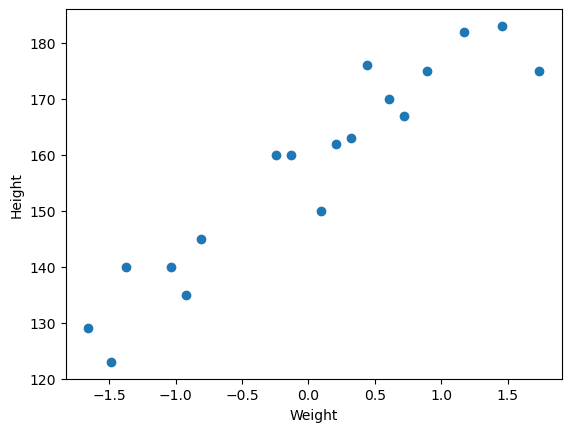

In [17]:
# now the scatter plot for the derived values
plt.scatter(X_train_std,y_train)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [18]:
# importing libs
from sklearn.linear_model import LinearRegression

In [19]:
regressor = LinearRegression()

In [20]:
# training model
regressor.fit(X_train_std,y_train)

LinearRegression()

In [21]:
print("The slope or coefficient of the weight is : ", regressor.coef_)

The slope or coefficient of the weight is :  [17.03440872]


In [22]:
print("Intercept : ",regressor.intercept_)

Intercept :  157.5


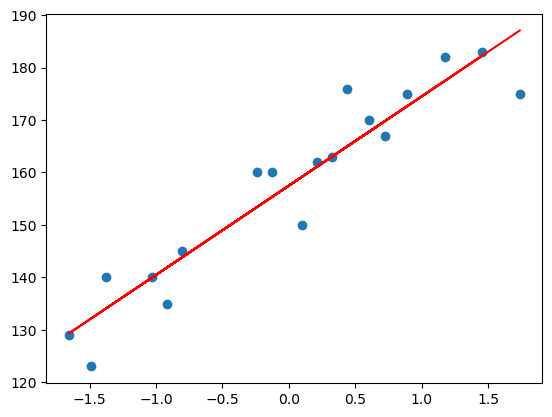

In [23]:
# plotting best fit line
plt.scatter(X_train_std,y_train)
plt.plot(X_train_std, regressor.predict(X_train_std),'r')
plt.show()

### prediction of train data
1. predicted height outputs = intercept + coeff_(weights)
2. y_pred_train = 157.5 + 17.03 (X_train_std)

### prediction of test data 
1. predicted height output = intercept + coeff_(weights)
2. y_pred_test = 157.5 + 17.03 (X_test_std)

In [24]:
y_test_pred = regressor.predict(X_test_std)

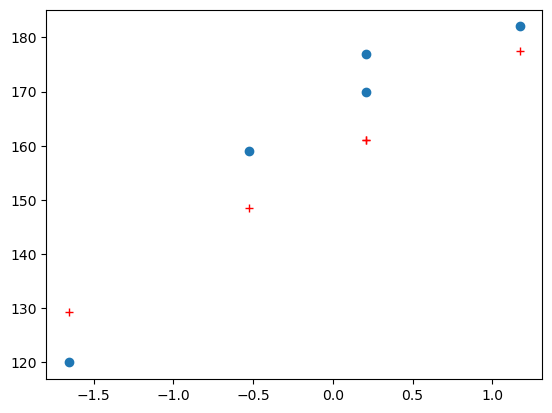

In [25]:
# observing predicted data and actual data

# original data
plt.scatter(X_test_std,y_test)

# predicted data
plt.plot(X_test_std, regressor.predict(X_test_std), 'r+') # replace 'r+' with 'r' to draw line instead of points

plt.show()

In [26]:
# actual data
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

In [27]:
# predicted data
y_test_pred

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

## Calculating 

### MSE, MAE, RMSE

### R square and Adjusted R square

### 1. **Mean Squared Error (MSE)**
   - **Definition**: The average of the squared differences between actual and predicted values.
   - **Significance**: Measures how well the model predicts; lower values indicate better performance.
   - **Formula**: 
   
   MSE = 1/n{ summation(i=1 to n){ (y_i - y_i(hat))^2}
   

### 2. **Mean Absolute Error (MAE)**
   - **Definition**: The average of the absolute differences between actual and predicted values.
   - **Significance**: Provides a more interpretable measure of error in the same unit as the target variable.
   - **Formula**:
   
   MSE = 1/n{ summation(i=1 to n){ mod(y_i - y_i(hat))}
   

### 3. **Root Mean Squared Error (RMSE)**
   - **Definition**: The square root of MSE.
   - **Significance**: Helps interpret the error in the same unit as the target variable; sensitive to large errors.
   - **Formula**:
   \[
   RMSE =  (MSE)^1/2
   \]

### 4. **R-squared (R²)**
   - **Definition**: Proportion of the variance in the dependent variable that is predictable from the independent variable.
   - **Significance**: Indicates model fit; values closer to 1 show a better fit.
   - **Formula**:
   
   R^2 = 1 - { SS_{res} / SS_{tot} }
   

### 5. **Adjusted R-squared**
   - **Definition**: A modified version of R² that adjusts for the number of predictors in the model.
   - **Significance**: Prevents overestimation of the model's performance when adding more variables.
   - **Formula**:
   
   Adjusted R^2 = 1 - { (1 - R^2)(n - 1) / (n - p - 1) }
   
   where \(n\) is the number of observations and \(p\) is the number of predictors.

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [29]:
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print("MAE : ",mae)
print("MSE : ",mse)
print("RMSE : ",rmse)

MAE :  9.822657814519232
MSE :  109.77592599051664
RMSE :  10.477400726827081


In [30]:
# remember, smaller the values of above 3 metrices better the model prediction is

## R square and Adjusted R Square

In [31]:
from sklearn.metrics import r2_score

In [32]:
score = r2_score(y_test, y_test_pred)
print(score)

0.776986986042344


In [33]:
# means our model has 77.6% accuracy

In [34]:
# to display adjusted R square
1 - (1- score) * (len(y_test)-1) / (len(y_test)-X_test.shape[1] -1)

0.7026493147231252

### Predicting new values through our model

In [35]:
# this is  our model
regressor

LinearRegression()

In [36]:
# Let's take a new point, weight = 80
# Now to predict height:

# standardizing or scaling it down
scaled_weight = scaler.transform([[80]])

scaled_weight

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [37]:
# since 'scaled_weight' is a 2-D array
scaled_weight[0]

array([0.32350772])

In [38]:
# to predict this weight 
print("Predicted height for the weight of 80 kgs is ",regressor.predict([scaled_weight[0]]))

Predicted height for the weight of 80 kgs is  [163.01076266]


### Some important Assumptions
When do we say our model is performing well? 
By having these assumptions

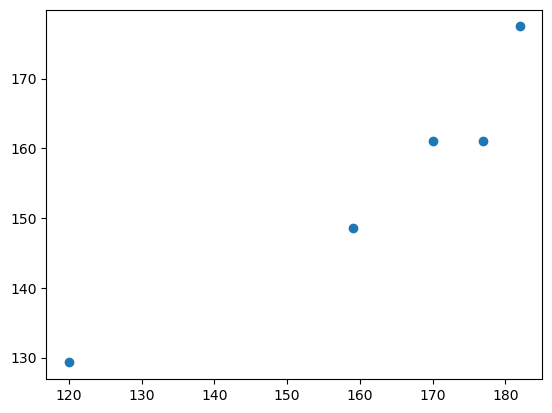

In [39]:
# 1. Scatter plot between original values and predicted values
# If we get a straight line, then we trained the model well
plt.scatter(y_test,y_test_pred)
plt.show()

<AxesSubplot: xlabel='Height', ylabel='Count'>

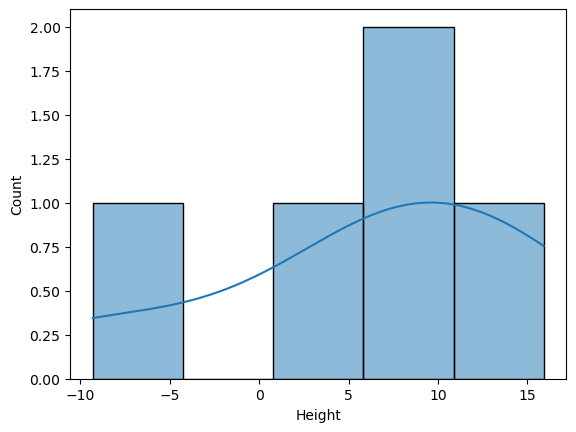

In [57]:
# 2. Plotting the residuals
# If the data is normally distributed then we made a good prediction 
# In this case, the data is a little bit left skewwed but its alright 
residuals = y_test - y_test_pred

import seaborn as sns
sns.histplot(residuals,kde=True,bins=5)

[]

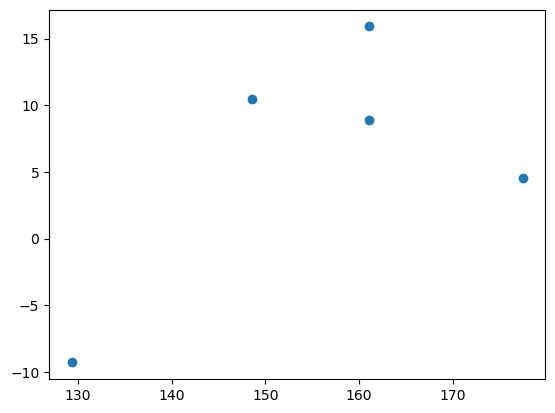

In [60]:
# 3. Scatter plot with respect to predictions and residuals
# It should be uniformally distributed for good prediction 

plt.scatter(y_test_pred,residuals)
plt.plot()

In [62]:
# pickling the file
# the model should be stored in form of some file for later deployment purposes

## Some Important Questions and their Answers
<br>

### 1. **What is Simple Linear Regression?**
   **Answer**: Simple Linear Regression is a statistical method that models the relationship between one dependent variable (output) and one independent variable (input) by fitting a linear equation to the observed data.

### 2. **What is the equation of a Simple Linear Regression model?**
   **Answer**: The equation is:
   \[
   y = mx + c
   \]
   where \(y\) is the predicted value, \(x\) is the independent variable, \(m\) is the slope of the line, and \(c\) is the intercept.

### 3. **What does the slope and intercept represent in Simple Linear Regression?**
   **Answer**: The slope (\(m\)) represents the rate at which the dependent variable changes with respect to the independent variable. The intercept (\(c\)) represents the value of the dependent variable when the independent variable is zero.

### 4. **What are the assumptions of Simple Linear Regression?**
   **Answer**: The key assumptions are:
   - Linearity: The relationship between independent and dependent variables is linear.
   - Independence: Observations are independent of each other.
   - Homoscedasticity: The variance of residuals is constant across all levels of the independent variable.
   - Normality: Residuals should follow a normal distribution.

### 5. **How is the best-fit line determined in Simple Linear Regression?**
   **Answer**: The best-fit line is determined by minimizing the sum of squared residuals (errors) between the actual and predicted values. This method is called Ordinary Least Squares (OLS).

### 6. **What is R-squared in Simple Linear Regression?**
   **Answer**: R-squared (\(R^2\)) is a statistical measure that indicates the proportion of variance in the dependent variable that is predictable from the independent variable. It ranges from 0 to 1, with values closer to 1 indicating a better fit.

### 7. **What is the difference between R-squared and Adjusted R-squared?**
   **Answer**: While \(R^2\) indicates the goodness of fit, Adjusted R-squared adjusts for the number of predictors in the model and penalizes adding irrelevant variables. It gives a more accurate measure of model performance, especially with multiple predictors.

### 8. **What are residuals in Simple Linear Regression?**
   **Answer**: Residuals are the differences between the actual values of the dependent variable and the predicted values by the regression model. They represent the error in the predictions.

### 9. **How can you check if a Simple Linear Regression model is appropriate?**
   **Answer**: You can check the model's appropriateness by:
   - Plotting residuals vs. fitted values (to check for patterns or non-linearity).
   - Checking for normality of residuals with a Q-Q plot.
   - Checking \(R^2\) and Adjusted \(R^2\) for model fit.
   - Testing for homoscedasticity (constant variance).

### 10. **What are the limitations of Simple Linear Regression?**
   **Answer**: Limitations include:
   - It assumes a linear relationship between variables, which may not always hold.
   - Sensitive to outliers, which can skew results.
   - It can't handle multiple independent variables, making it less suitable for complex data relationships.